(sec-prior-influence)=
# L'influenza della distribuzione a priori

La notazione $p(\theta \mid y) \propto p(\theta) \ p(y \mid \theta)$ rende particolarmente chiaro che la distribuzione a posteriori è un "miscuglio" della distribuzione a priori e della verosimiglianza. Prima di preoccuparci di come calcolare la distribuzione a posteriori in casi diversi dalle famiglie coniugate, cerchiamo di capire meglio cosa significa "mescolare" la distribuzione a priori e la verosimiglianza. Considereremo qui un esempio discusso da {cite}`Johnson2022bayesrules`.

## Il test di Benchdel

Nel fumetto di Alison Bechdel *The Rule*, un personaggio afferma di guardare un film solo se soddisfa le seguenti tre regole {cite}`Bechdel1986dykes`: almeno due caratteri nel film devono essere donne; queste due donne si parlano; parlano di qualcosa altro oltre a parlare di qualche uomo.

Questi criteri costituiscono il *test di Bechdel* per la rappresentazione delle donne nei film. {cite}`Johnson2022bayesrules` pongono la seguente domanda "Quale percentuale dei film che avete visto supera il test di Bechdel?".

Sia $\pi \in [0, 1]$ una variabile casuale che indica la proporzione sconosciuta di film che superano il test di Bechdel. Tre amiche --- la femminista, l'ignara e l'ottimista --- hanno opionioni diverse su $\pi$. Riflettendo sui film che ha visto, la femminista capisce che nella maggioranza dei film mancano personaggi femminili forti. L'ignara non ricorda bene i film che ha visto, quindi non sa quanti film superano il test di Bechdel. Infine, l'ottimista pensa che, in generale, le donne siano ben rappresentate all'interno dei film: secondo lei quasi tutti i film superano il test di Bechdel. Le tre amiche hanno dunque tre modelli a priori diversi di $\pi$.

Abbiamo visto in precedenza come sia possibile usare la distribuzione Beta per rappresentare le credenze a priori. Ponendo la gran parte della massa della probabilità a priori su valori $\pi < 0.5$, la distribuzione a priori $\text{Beta}(5, 11)$ riflette il punto di vista femminista secondo il quale la maggioranza dei film non supera il test di Bechdel. Al contrario, la $\text{Beta}(14,1)$ pone la gran parte della massa della distribuzione a priori su valori $\pi$ prossimi a 1, e corrisponde quindi alle credenze a priori dell'amica ottimista. Infine, una $\text{Beta}(1 ,1)$ o $\mbox{Unif}(0, 1)$, assegna lo stesso livello di plausibilità a tutti i valori $\pi \in [0, 1]$, e corrisponde all'incertezza a priori dell'ignara.

Nell'esempio di {cite}`Johnson2022bayesrules`, le tre amiche decidono di rivedere un campione di $n$ film e di registrare $y$, ovvero il numero di film che superano il test di Bechdel. Se $y$ corrisponde al numero di "successi" in un numero fisso di $n$ prove Bernoulliane i.i.d., allora la dipendenza di $y$ da $\pi$ viene specificata da un modello binomiale. Quindi, per ciascuna delle tre amiche è possibile scrivere un modello beta-binomiale

$$
\begin{align}
Y \mid \pi & \sim \mbox{Bin}(n, \pi)  \notag\\
\pi & \sim \mbox{Beta}(\alpha, \beta) \notag
\end{align}
$$

che utilizza diversi parametri $\alpha$ e $\beta$ per la distribuzione a priori e che conduce a tre diverse distribuzioni a posteriori per il parametro sconosciuto $\pi$:

$$
\pi \mid (Y = y) \sim \mbox{Beta}(\alpha + y, \beta + n - y).
$$

{cite}`Johnson2022bayesrules` si chiedono come le credenze a priori delle tre amiche influenzano le credenze a posteriori a cui esse giungono dopo avere osservato i dati. Si chiedono inoltre in che modo la dimensione del campione moduli l'influenza della distribuzione a priori sulla distribuzione a posteriori.

Per rispondere a queste domande, {cite}`Johnson2022bayesrules` consideriamo tre diversi scenari:

-   gli stessi dati osservati, ma distribuzioni a priori diverse;
-   dati diversi, ma la stessa distribuzione a priori;
-   dati diversi e distribuzioni a priori diverse.

## Stessi dati, diverse distribuzioni a priori

Iniziamo con lo scenario che descrive il caso in cui abbiamo gli stessi dati ma diverse distribuzioni a priori. Supponiamo che le tre amiche decidano di guardare insieme 20 film selezionati a caso.

In [15]:
%load_ext rpy2.ipython
%config InlineBackend.figure_format = 'retina'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [17]:
%%R
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(janitor))
suppressPackageStartupMessages(library(bayesrules))
suppressPackageStartupMessages(library(patchwork))

data(bechdel, package = "bayesrules")
set.seed(84735)
bechdel_20 <- bechdel %>% 
  sample_n(20)

# A tibble: 3 × 3
   year title      binary
  <dbl> <chr>      <chr> 
1  2005 King Kong  FAIL  
2  1983 Flashdance PASS  
3  2013 The Purge  FAIL  


Di questi 20 film, solo il 45% ($y$ = 9) passa il test di Bechdel.

|       |  n  | percent |
| ----- | --- | ------- |
| FAIL  | 11  |   0.55  |
| PASS  |  9  |   0.45  |
| Total | 20  |   1.00  |

Esaminiamo le tre distribuzioni a posteriori. Per la femminista usiamo una distribuzione a priori $\text{Beta}(5, 11)$.

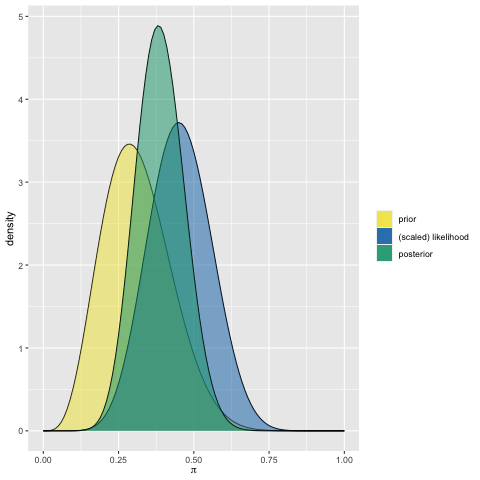

In [10]:
%%R
bayesrules::plot_beta_binomial(alpha = 5, beta = 11, y = 9, n = 20) 

Per l'ottimista usiamo una distribuzione a priori $\text{Beta}(14, 1)$.

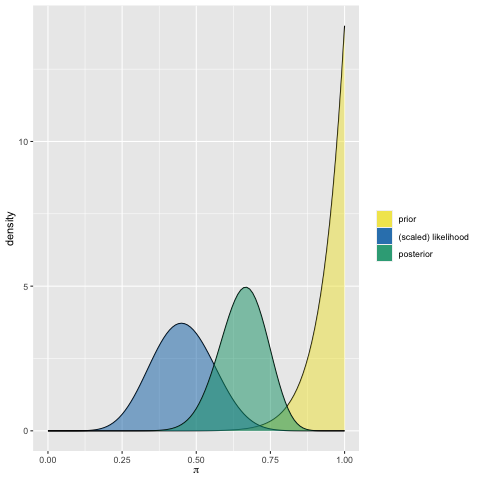

In [12]:
%%R
bayesrules:::plot_beta_binomial(alpha = 14, beta = 1, y = 9, n = 20) 

Infine, per l'ignara usiamo una distribuzione a priori $\text{Beta}(1, 1)$.

In [ ]:
%%R
bayesrules:::plot_beta_binomial(alpha = 1, beta = 1, y = 9, n = 20)

Per calcolare la distribuzione a posteriori, ho usato le funzioni del pacchetto `bayesrules`. Ma per lo schema beta-binomiale è facile trovare i parametri della distribuzione a posteriori. Per esempio, nel caso dell'amica femminista, la distribuzione a posteriori è una Beta di parametri

$$
\alpha_{post} = \alpha_{prior} + y = 5+9 = 14
$$

e

$$
\beta_{post} = \beta_{prior} + n - y = 11 + 20 - 9 = 22.
$$

L'aggiornamento bayesiano indica che le tre amiche otterranno valori molto diversi per la media (o la moda) a posteriori del parametro $\pi$. Dunque, anche dopo avere visto 20 film, le tre amiche non si trovano d'accordo su quale sia la proporzione di film che passano il test di Bechdel.

Questo non dovrebbe sorprenderci. L'amica ottimista aveva opinioni molto forti sul valore di $\pi$ e i *pochi* nuovi dati che le sono stati forniti non sono riusciti a convincerla a cambiare idea: pensa ancora che i valori $\pi > 0.5$ siano i più credibili. Lo stesso si può dire, all'estremo opposto, dell'amica femminista: anche lei continua a pensare che i valori $\pi < 0.5$ siano i più credibili. Infine, l'ignara non aveva nessuna opinione a priori su $\pi$ e, anche dopo avere visto 20 film, continua a pensare che il valore $\pi$ più credibile sia quello intermedio, nell'intorno di 0.5.

In conclusione, quando i dati sono deboli (ovvero, quando il campione è piccolo), l'aggiornamento bayesiano altera solo in piccola misura le distribuzioni a priori.


## Dati diversi, stessa distribuzione a priori

Supponiamo ora che l'amica ottimista abbia tre amiche, Maria, Anna e Sara, tutte ottimiste come lei. L'ottimista chiede a Maria, Anna e Sara di fare loro stesse l'esperimento descritto in precedenza. Maria guarda 13 film; di questi 6 passano il test di Bechdel. Anna guarda 63 film; di questi 29 passano il test di Bechdel. Sara guarda 99 film; di questi 46 passano il test di Bechdel.

Supponiamo che Maria, Anna e Sara condividano la stessa credenza a priori su $\pi$: ovvero, Beta(14, 1). In tali circostanze e, alla luce dei dati osservati, cosa possiamo dire delle tre distribuzioni a posteriori?

Nella figura è rappresentato l'aggiornamento bayesiano per le credenze di Maria (sinistra, 16 film), Anna (centro, 63 film) e Sara (destra, 99 film).

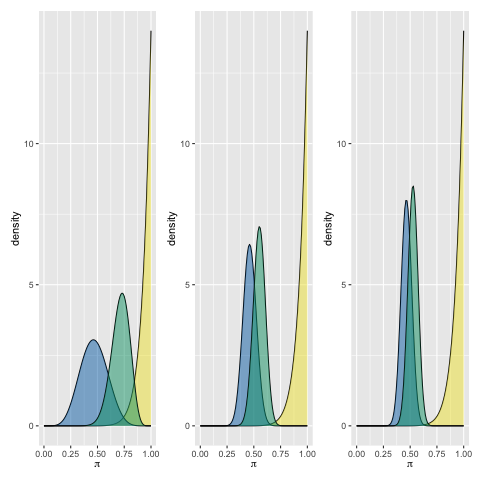

In [14]:
%%R
p1 <- bayesrules:::plot_beta_binomial(
  alpha = 14, beta = 1, y = 6, n = 13
  ) + 
  theme(legend.position = "none") 
p2 <- bayesrules:::plot_beta_binomial(
  alpha = 14, beta = 1, y = 29, n = 63
  ) + 
  theme(legend.position = "none") 
p3 <- bayesrules:::plot_beta_binomial(
  alpha = 14, beta = 1, y = 46, n = 99
  ) +
  theme(legend.position = "none") 
p1 + p2 + p3

In conclusione, dalla figura precedente notiamo due cose. Primo, all'aumentare delle informazioni disponibili (ovvero, al crescere dell'ampiezza del campione), la distribuzione a posteriori si allontana sempre di più dalla distribuzione a priori e si avvicina sempre di più alla verosimiglianza. Secondo, all'aumentare dell'ampiezza del campione la varianza della distribuzione a posteriori diminuisce sempre di più --- ovvero, diminuisce l'incertezza su quelli che sono i valori $\pi$ più credibili.

## Dati diversi, diverse distribuzioni a priori

La figura seguente illustra le distribuzioni a posteriori che si ottengono incrociando tre diversi set di dati ($y$ = 6, $n$ = 13;, $y$ = 29, $n$ = 63; $y$ = 66, $n$ = 99) con tre diverse distribuzioni a priori, $\mbox{Beta}(14, 1)$, $\mbox{Beta}(5, 11)$ e $\mbox{Beta}(1, 1)$. Sulle colonne della figura (a partire da sinistra) i dati utilizzati sono, rispettivamente, (y = 6, n = 13), (y = 29, n = 63) e (y = 66, n = 99). Sulle righe (a partire dall'alto), le distribuzioni a priori usate sono: Beta(14, 1), Beta(5, 11) e Beta(1, 1).

In [ ]:
%%R
p1 <- bayesrules:::plot_beta_binomial(
  alpha = 14, beta = 1, y = 6, n = 13
  ) +
  theme(legend.position = "none") 
p2 <- bayesrules:::plot_beta_binomial(
  alpha = 14, beta = 1, y = 29, n = 63
  ) +
  theme(legend.position = "none") 
p3 <- bayesrules:::plot_beta_binomial(
  alpha = 14, beta = 1, y = 46, n = 99
  ) +
  theme(legend.position = "none") 
p4 <- bayesrules:::plot_beta_binomial(
  alpha = 5, beta = 11, y = 6, n = 13
  ) +
  theme(legend.position = "none") 
p5 <- bayesrules:::plot_beta_binomial(
  alpha = 5, beta = 11, y = 29, n = 63
  ) +
  theme(legend.position = "none") 
p6 <- bayesrules:::plot_beta_binomial(
  alpha = 5, beta = 11, y = 46, n = 99
  ) +
  theme(legend.position = "none") 
p7 <- bayesrules:::plot_beta_binomial(
  alpha = 1, beta = 1, y = 6, n = 13
  ) +
  theme(legend.position = "none") 
p8 <- bayesrules:::plot_beta_binomial(
  alpha = 1, beta = 1, y = 29, n = 63
  ) +
  theme(legend.position = "none") 
p9 <- bayesrules:::plot_beta_binomial(
  alpha = 1, beta = 1, y = 46, n = 99
  ) +
  theme(legend.position = "none") 
(p1 + p2 + p3) / (p4 + p5 + p6) / (p7 + p8 + p9)

In conclusione, la figura precedente ci consente di concludere quanto segue: se il campione è grande, una distribuzione a priori debolmente informativa ha uno scarso effetto sulla distribuzione a posteriori; se il campione è piccolo, invece, anche una distribuzione a priori debolmente informativa ha un grande effetto sulla distribuzione a posteriori.

## Collegare le intuizioni alla teoria

Il compromesso che abbiamo osservato nell'esempio precedente, ovvero l'equilibrio che si ottiene tra la distribuzione a priori e le evidenze fornite dai dati, è molto vicino alle nostre intuizioni. Ma è anche il frutto di una necessità matematica. È infatti possibile riscrivere l'eq. {eq}`eq-ev-post-beta-bin-1` nel modo seguente

$$
\begin{align}
\mathbb{E}_{\text{post}} &[\text{Beta}(\alpha + y, \beta + n - y)] = \frac{\alpha + y}{\alpha + \beta +n}\notag\\ 
&= \frac{a+b}{a+b+n} \cdot \frac{a}{a+b} + \frac{n}{a+b+n} \cdot \frac{y}{n}.
\end{align}
$$ (eq-ev-post-beta-bin)

L'eq. {eq}`eq-ev-post-beta-bin` indica che il valore atteso a posteriori è una media pesata fra il valore atteso a priori $\left( \frac{\alpha}{\alpha+\beta}\right)$ e la proporzione osservata di successi $\left(\frac{y}{n}\right)$. I pesi sono $\left( \frac{\alpha+\beta}{\alpha+\beta+n}\right)$ e $\left( \frac{n}{\alpha+\beta+n}\right)$. Quindi, quando $n$ è grande rispetto ad $\alpha + \beta$, contano molto i dati osservati e contano poco le credenze a priori. Viceversa, quando $n$ è piccolo rispetto a $\alpha + \beta$, i dati contano poco rispetto alla credenza a priori.

Queste osservazioni ci fanno capire come scegliere i parametri $\alpha$ e $\beta$: se vogliamo assumere una totale ignoranza rispetto al fenomeno in esame, la scelta coerente è $\alpha = \beta = 1$ (ogni valore di $\theta$ è ugualmente credibile); se invece abbiamo delle forti credenze a priori, allora possiamo scegliere $\alpha$ così che sia uguale al valore atteso a priori, mentre $\alpha + \beta$ esprime l'importanza che diamo all'informazione a priori: maggiore è il valore di $\alpha + \beta$, tanti più dati serviranno per allontanare la distribuzione a posteriori dalla distribuzione a priori. Infine, se $n$ è grande, la distribuzione a posteriori avrà una scarsa influenza sulla distribuzione a priori, a meno di scelte estreme.

## Commenti e considerazioni finali 

La conclusione che possiamo trarre dall'esempio discusso da {cite}`Johnson2022bayesrules` è molto chiara: l'aggiornamento bayesiano può essere paragonato ai processi di ragionamento del senso comune. Quando le nuove evidenze (i dati) sono deboli, non c'è ragione di cambiare idea (le nostre credenze "a posteriori" sono molto simili a ciò che pensavamo prima di avere osservato i dati). Quando le nuove evidenze sono irrefutabili, invece, è necessario modificare le nostre credenze sulla base di ciò che ci dicono i dati, quali che siano le nostre credenze pregresse --- non farlo significherebbe vivere in un mondo di fantasia e avere scarse possibilità di sopravvivere nel mondo empirico. L'aggiornamento bayesiano, dunque, non fa altro che esprimere in maniera quantitativa e precisa ciò che ci dicono le nostre intuizioni.

Alla luce di quanto detto sopra, è sorprendente che l'approccio frequentista neghi questa logica. I test frequentisti non tengono conto delle conoscenze pregresse. Dunque, se un test frequentista, calcolato su un piccolo campione (ovvero, quando i dati sono molto deboli), suggerisce che dovremmo farci un'opinione di un certo tipo sul fenomeno in esame, l'indicazione è quella di prendere seriamente in considerazione il risultato del test (ovvero di modificare le nostre credenze) *quali che siano le evidenze precedenti* -- le quali, in generale, potrebbero mostrare che il risultato del test non ha alcun senso. Un tale modo di pensare viene preso sul serio da coloro che, nella comunità scientifica, seguono l'approccio frequentista. Dato che in questo Capitolo abbiamo parlato di fumetti, concluderei dicendo che il significato della presente discussione è catturata nella maniera più chiara possibile in questa famosa [striscia](https://xkcd.com/1132/).